In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/all_sauce3.zip

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from os import listdir
from os.path import isfile, join
import tensorflow

In [3]:
rawImages = []
labels = []

In [4]:
mypath = 'all_sauce/'
imagePaths = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
batch_size = 32
num_classes = 4
epochs = 16
data_augmentation = True
num_predictions = 20
width = 150
height = 150
#images = np.empty((0, 150,150,3))
labels = []
rawImage = []

In [6]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    label = imagePath.split('/')[1].split('.')[0]
    image = cv2.resize(image, (width,height))
    
    #images = np.append(images, [image], axis=0)
    labels.append(label)
    rawImage.append(image)
    
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/3968
[INFO] processed 2000/3968
[INFO] processed 3000/3968


In [7]:
images_array = np.array(rawImage)
images_array.shape

(3968, 150, 150, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_array, np.array(labels), test_size=0.2,random_state=1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [13]:
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [15]:
seq_model = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/16
75/75 [==============================] - 95s 1s/step - loss: 0.5228 - accuracy: 0.4412 - val_loss: 0.4140 - val_accuracy: 0.6814
Epoch 2/16
75/75 [==============================] - 97s 1s/step - loss: 0.3344 - accuracy: 0.7328 - val_loss: 0.2401 - val_accuracy: 0.8098
Epoch 3/16
75/75 [==============================] - 94s 1s/step - loss: 0.2321 - accuracy: 0.8273 - val_loss: 0.1989 - val_accuracy: 0.8438
Epoch 4/16
75/75 [==============================] - 97s 1s/step - loss: 0.1893 - accuracy: 0.8639 - val_loss: 0.1519 - val_accuracy: 0.8917
Epoch 5/16
75/75 [==============================] - 97s 1s/step - loss: 0.1586 - accuracy: 0.8836 - val_loss: 0.1395 - val_accuracy: 0.8967
Epoch 6/16
75/75 [==============================] - 97s 1s/step - loss: 0.1372 - accuracy: 0.9017 - val_loss: 0.1184 - val_accuracy: 0.9068
Epoch 7/16
75/75 [==============================] - 96s 1s/step - loss: 0.1221 - accuracy: 0.9202 - val_loss: 0.1018 - val_accuracy: 0.9244
Epoch 8/16
75/75 [==

In [16]:
value = model.predict(X_test)
y_pred =np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [17]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       172
           1       0.95      0.97      0.96       235
           2       0.98      0.99      0.98       223
           3       0.99      0.96      0.98       164

    accuracy                           0.96       794
   macro avg       0.97      0.96      0.96       794
weighted avg       0.96      0.96      0.96       794



In [18]:
import pandas as pd
metrics = pd.DataFrame(seq_model.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.522778,0.441176,0.413994,0.681360
1,0.334434,0.732773,0.240080,0.809824
2,0.232080,0.827311,0.198866,0.843829
3,0.189328,0.863866,0.151910,0.891688
4,0.158600,0.883613,0.139496,0.896725
5,0.137226,0.901681,0.118411,0.906801
6,0.122112,0.920168,0.101815,0.924433
7,0.107008,0.923109,0.102985,0.929471
8,0.097644,0.933193,0.090547,0.925693
9,0.081624,0.950000,0.074277,0.940806


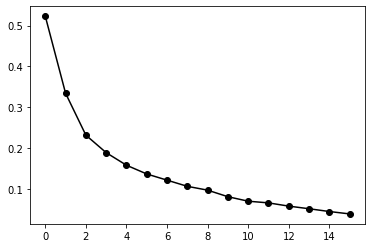

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(seq_model.history.values())[0],'k-o')

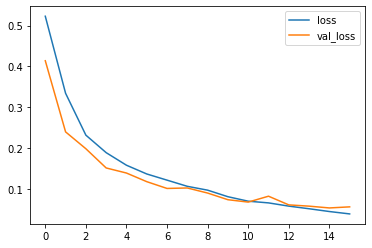

In [20]:
metrics[['loss', 'val_loss']].plot()

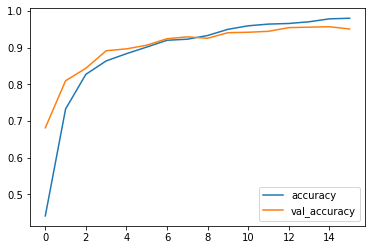

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

(1, 150, 150, 3)


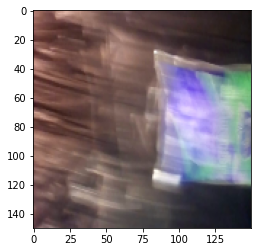

[9.7614616e-01 1.8917918e-03 7.7098608e-04 1.5272051e-02]
0.97614616
[0]


In [22]:
#######
img_path = 'all_sauce/maeyupa.9.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
#img = image.load_img(img_path, target_size=(150, 150))
#img_tensor = image.img_to_array(img)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor = img_tensor.astype('float32')
img_list = []
image = cv2.imread(img_path)
image = cv2.resize(image, (width,height))
img_list.append(image)
img_list = np.array(img_list)
img_list = img_list.astype('float32')


# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_list /= 255.
# Its shape is (1, 150, 150, 3)

print(img_list.shape)

plt.imshow(img_list[0])
#plt.imshow(X_test[0])
plt.show()

prediction = model.predict(np.array([img_list[0]]))
#prediction = model.predict(np.array([X_test[0]]))
print(prediction[0])
print(max(prediction[0]))
y_classes = prediction.argmax(axis=-1)
print(y_classes)

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/test_all_sauce2.zip

In [24]:
mypath_test = 'New folder/'
imagePaths_test = [mypath_test+f for f in listdir(mypath_test) if isfile(join(mypath_test, f))]

In [25]:
#######
for (i, img_path) in enumerate(imagePaths_test):
  #img_path = 'all_sauce/ocean.'+str(i)+'.jpg'
  img_list = []
  image = cv2.imread(img_path)
  image = cv2.resize(image, (width,height))
  img_list.append(image)
  img_list = np.array(img_list)
  img_list = img_list.astype('float32')


  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_list /= 255.
  # Its shape is (1, 150, 150, 3)

  print(img_list.shape)
  print(img_path)

  #plt.imshow(img_list[0])
  #plt.imshow(X_test[0])
  #plt.show()

  prediction = model.predict(np.array([img_list[0]]))
  #prediction = model.predict(np.array([X_test[0]]))
  print(prediction[0])
  print(max(prediction[0]))
  y_classes = prediction.argmax(axis=-1)
  print(y_classes)
  print("#####")

(1, 150, 150, 3)
New folder/all.903.ocean.jpg
[7.3411691e-01 1.0691029e-01 3.2758713e-04 4.2736530e-04]
0.7341169
[0]
#####
(1, 150, 150, 3)
New folder/all.1100.maeyupa.jpg
[9.1627061e-01 2.9883116e-02 4.8329497e-05 1.4663339e-03]
0.9162706
[0]
#####
(1, 150, 150, 3)
New folder/all.536.ocean.jpg
[0.94158673 0.00557801 0.00180647 0.01230094]
0.94158673
[0]
#####
(1, 150, 150, 3)
New folder/all.462.ocean.jpg
[7.0210260e-01 3.1986275e-01 3.3384562e-04 7.9548359e-04]
0.7021026
[0]
#####
(1, 150, 150, 3)
New folder/all.242.zapnuerchick.jpg
[5.4892004e-03 1.1644593e-04 8.2907379e-03 9.6930218e-01]
0.9693022
[3]
#####
(1, 150, 150, 3)
New folder/all.487.zapnuerchick.jpg
[1.8704921e-02 1.7931114e-05 1.1570878e-04 9.7349060e-01]
0.9734906
[3]
#####
(1, 150, 150, 3)
New folder/all.339.zapnuerchick.jpg
[2.2014976e-04 1.0845588e-05 5.7268695e-05 9.9922240e-01]
0.9992224
[3]
#####
(1, 150, 150, 3)
New folder/all.902.ocean.jpg
[9.7542870e-01 1.0045141e-02 1.9354395e-06 6.0908395e-05]
0.9754287
[0]
#

In [26]:
model.save_weights("train_sauce.h5")